# Hands-on: Separation of gamma and hadron showers measured with the MAGIC Cherenkov telescope using a boosted decision tree and a random forest

The [MAGIC telescope](https://en.wikipedia.org/wiki/MAGIC_(telescope) is a Cherenkov telescope situated on La Palma, one of the Canary Islands. The [MAGIC machine learning dataset](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope) can be obtained from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

Our task is to separate signal events (gamma showers) and background events (hadron showers) based on the features of a measured Cherenkov shower.

The features of a shower are:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10. fDist:    continuous  # distance from origin to center of ellipse [mm]
    11. class:    g,h         # gamma (signal), hadron (background)

g = gamma (signal):     12332
h = hadron (background): 6688

For technical reasons, the number of h events is underestimated.
In the real data, the h class represents the majority of the events.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# read data
filename = "../data/magic04_data.txt"
df = pd.read_csv(filename, engine='python')

# relabel: gamma shower (g) --> 1 (signal), hadron shower (h) --> 0 (background) 
df['class'] = df['class'].map({'g': 1, 'h': 0})

In [4]:
# y = value to predict, X = features
y = df['class'].values
X = df[[col for col in df.columns if col!="class"]]

In [5]:
# generate training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

We will use [XGBoost](https://xgboost.readthedocs.io/en/latest/). The training will take a few seconds.

In [6]:
# train XGBoost boosted decision tree
import xgboost as xgb
import time
XGBclassifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=1000)
start_time = time.time()
XGBclassifier.fit(X_train, y_train)
run_time = time.time() - start_time

In [7]:
# predect labels for the test sample
y_pred_xgb = XGBclassifier.predict(X_test) # 0 or 1
y_pred_xgb_prob = XGBclassifier.predict_proba(X_test) # probabilities

In [8]:
# print some performance parameters
from sklearn.metrics import roc_auc_score
print("Model Accuracy: {:.2f}%".format(100*XGBclassifier.score(X_test, y_test)))
print("AUC score: {:.2f}".format(roc_auc_score(y_test,y_pred_xgb)))
print("Run time: {:.2f} sec\n\n".format(run_time))

Model Accuracy: 89.54%
AUC score: 0.87
Run time: 34.36 sec




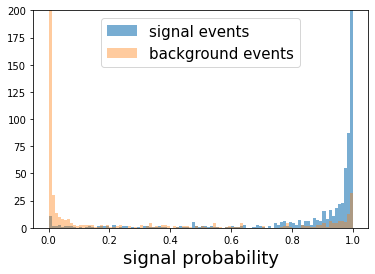

In [9]:
# plot predicted probabilities for the test sample for signal and background events
y_pred_xgb_prob_signal = y_pred_xgb_prob[:,1][y_test == 1]
y_pred_xgb_prob_backgr = y_pred_xgb_prob[:,1][y_test == 0]
plt.hist(y_pred_xgb_prob_signal, bins=100, alpha = 0.6, label='signal events'); 
plt.hist(y_pred_xgb_prob_backgr, bins=100, alpha = 0.4, label='background events');
plt.ylim(0.,200.)
plt.xlabel("signal probability", fontsize=18)
plt.legend(fontsize=15, loc='upper center')

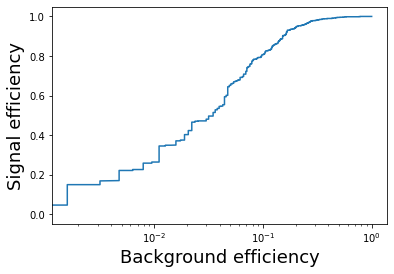

In [10]:
# plot signal efficiency vs. background efficiency
# we want the signal efficiency to be large and the background efficiency to be small

from sklearn.metrics import roc_curve

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prob[:,1])
plt.plot(fpr_xgb, tpr_xgb)
plt.xscale("log")
plt.xlabel('Background efficiency', fontsize=18)
plt.ylabel('Signal efficiency', fontsize=18);

a) Which is the most important feature for discriminating signal and background according to XGBoost? Hint: use plot_impartance from XGBoost (see [XGBoost plotting API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting)). Do you get the same answer for all three performance measures provided by XGBoost (“weight”, “gain”, or “cover”)?

In [11]:
# your code here (one line)


b) Visualize one decision tree from the ensemble (let's say tree number 10). For this you need the the graphviz package (`pip3 install graphviz`)

In [12]:
# your code here (one line)


c) Compare the performance of XGBoost with the [**random forest classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from [**scikit learn**](https://scikit-learn.org/stable/index.html). Plot signal and background efficiency for both classifiers in one plot. Which classifier performs better?

In [13]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(random_state=0)

# your code here
